#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Análisis de grandes volúmenes de datos**
###Tecnológico de Monterrey
###Wilberth Eduardo López Gómez | A01795997

## **Actividad 3 | Aprendizaje supervisado y no supervisado**

## Introducción

La preparación y análisis de grandes volúmenes de datos requiere no solo de infraestructuras robustas, sino también de técnicas precisas para transformar la información en conocimiento útil. Todo inicia con el algoritmo, el cual es esencial en la etapa de entrenamiento del modelo, donde la entrada es un conjunto de datos y la salida es un modelo entrenado. El proceso de análisis se puede dividir en dos grandes etapas: preparación de los datos y modelado mediante algoritmos de Machine Learning (abreviado como ML).

### **Etapas de Preparación de Datos**

Antes de aplicar cualquier modelo de ML, como primer paso se tiene que realizar una adecuada preparación de los datos. Esto garantiza que los algoritmos trabajen con información que pueda procesarse sin ningún impedimento (es decir, limpia), estructurada y representativa, esto se logra mediante las siguientes técnicas:

- **Vector Assembler**: Su función es combinar múltiples columnas de datos en un solo vector, necesario para alimentar modelos de machine learning.
- **One Hot Encoding (Codificación One-Hot)**: Este método se utiliza para convertir variables categóricas en una representación numérica binaria. Consiste en crear una columna para cada categoría posible de una variable, asignando un valor de 1 si la observación pertenece a esa categoría y 0 en caso contrario.
- **Missing Values (Valores Faltantes)**: Es común encontrar datos incompletos, por lo que existen diversas estrategias para tratarlos, como eliminar registros incompletos, imputar valores faltantes mediante estadísticas (como la media o la mediana) o utilizar algoritmos más avanzados.

### **Algoritmos de Aprendizaje Supervisado**

El aprendizaje supervisado se basa en el uso de datos etiquetados para entrenar modelos capaces de predecir resultados futuros. Las etiquetas permiten al modelo corregir su comportamiento durante el entrenamiento, ajustando sus predicciones con base en los valores esperados.

#### Modelos de Clasificación

La clasificación consiste en predecir la probabilidad de que un dato pertenezca a una categoría discreta o clase, analizando sus características de entrada. Donde la salida del sistema es una predicción para la portabilidad de un dato perteneciente a la categoría. Se tienen tres tipos de clasificación:

- Binary: Se refiere a la clasificación de una variable de dos maneras posibles, como por ejemplo: `True/False` o `1/0`.
- Multiclass: Datos que se clasifican por alguna categoría perteneciente a un conjunto de categorías existentes en el sistema.
- Multilabel: Datos que pueden pertenecer simultáneamente a varias categorías dentro del conjunto existente.

Algunos ejemplos de implementaciones disponibles en PySpark a partir de la librería de MLlib son:

- LogisticRegression.
- DecisionTreeClassifier.
- RandomForestClassifier.
- GBTClassifier.
- MultilayerPerception Classifier.
- LinearSVC.
- OneVsRest.
- NaiveBayes.
- FMClassifier.

#### Modelos de Regresión

Es el proceso de estimación de una relación entre una o más variables dependientes con una o más variables independientes. Se tienen tres tipos de regresión:

- Simple: Solo hay una variable independiente y una dependiente, por lo que queda como una relación donde existe un valor para entrenar y uno para predecir.
- Multiple: Donde se tiene una variable dependiente para predecir múltiples variables independientes para entrenamiento y entrada.
- Multivariate: Similar a lo que es el proceso de clasificación "multilabel", existen múltples variables dependientes para predecir multiples variables independientes para entrada y entrenamiento. Donde la entrada y salida se representan como vectores de valores numéricos.

Algunas implementaciones disponibles son:

- AFTSurvivalRegression.
- DecisionTreeRegressor
- GBTRegressor.

### **Algoritmos de Aprendizaje no Supervisado**

Son empleadas cuando el conjunto de datos carece de etiquetas, pero se espera encontrar patrones ocultos o estructuras internas sin la necesidad de conocer el reultado deseado.

#### Frequent Pattern Mining

Se basa en la identificación de reglas para descubrir relaciones entre variables de los datos. Generalmente, buscan primero elementos frecuentes en el conjunto de datos, luego pares y conjuntos de elementos frecuentes.

#### Clustering

Es una técnica de agrupamiento para descubrir patrones/relacions incógnitas entre datos. Usualmente empleado en segmentación del cliente, procesamiento y detección en imágenes, entre otros casos.

Cada elemento se asigna a un grupo el cual se define de manera central, donde su similitud de un elemento a un grupo se calcula por la distancia desde el punto central del grupo.

Algunos algoritmos de clustering, como K-Means, utilizan la letra k para representar la cantidad de grupos que se desea formar. Ya que, agrupa los datos en “k” clústeres o grupos, donde cada observación pertenece al grupo con el centroide más cercano. El algoritmo intenta minimizar la distancia interna de cada grupo, creando agrupaciones de elementos similares. Es eficiente, aunque sensible a la elección de "k" y a la escala de los datos.

## Selección de los datos

Para la parte de la preparación de los datos, se importan las librerías, tanto para realizar el enlace con Google Drive, como las de PySpark para procesar el conjunto de datos.

In [1]:
# Conexión con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Generar sesión Spark
!pip install pyspark

In [3]:
# Librerias

from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import col, round, when, count

spark = SparkSession.builder \
    .appName("Caracterizacion Mortalidad MX") \
    .getOrCreate()

from functools import reduce
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Se realiza la lectura del archivo con extensión .parquet para el conjunto de datos, recordando que el conjunto de datos trata acerca de la población fallecida en México entre 2012 y 2022. En el cual se comprenden los patrones de mortalidad a través del análisis de un extenso conjunto de registros de defunción.

In [4]:
# Leer archivo base en formato Parquet
df_base = spark.read.parquet('/content/drive/My Drive/Colab Notebooks/BigData/Actividad3/data/mxmortality_rev.parquet')
df_base.printSchema()
print("Total registros:", df_base.count())

root
 |-- decease_date: string (nullable = true)
 |-- birth_date: string (nullable = true)
 |-- decease_date_UTC: string (nullable = true)
 |-- decease_date_solar: string (nullable = true)
 |-- decease_date_comp: string (nullable = true)
 |-- tod: double (nullable = true)
 |-- daylength: double (nullable = true)
 |-- gdaylength: double (nullable = true)
 |-- flux: double (nullable = true)
 |-- gflux: double (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- night: boolean (nullable = true)
 |-- gr_lismex: string (nullable = true)
 |-- desc: string (nullable = true)
 |-- sexo: long (nullable = true)
 |-- causa_def: string (nullable = true)
 |-- Br: double (nullable = true)
 |-- Bt: double (nullable = true)
 |-- Bp: double (nullable = true)
 |-- gBr: double (nullable = true)
 |-- gBt: double (nullable = true)
 |-- gBp: double (nullable = true)

Total registros: 7578742


In [5]:
df_base.show(5)

+------------+----------+-------------------+--------------------+-------------------+------------------+------------------+-------------------+---------+----------+-----------------+-------------------+-----+---------+--------------------+----+---------+-------------------+-------------------+------------------+-------------------+------------------+------------------+
|decease_date|birth_date|   decease_date_UTC|  decease_date_solar|  decease_date_comp|               tod|         daylength|         gdaylength|     flux|     gflux|              lat|               long|night|gr_lismex|                desc|sexo|causa_def|                 Br|                 Bt|                Bp|                gBr|               gBt|               gBp|
+------------+----------+-------------------+--------------------+-------------------+------------------+------------------+-------------------+---------+----------+-----------------+-------------------+-----+---------+--------------------+----+---------

Como primer paso, se procede a normalizar los datos, de modo que se filtran los outliers donde la condición sea que `decease_date > 2022` o que `decease_date < 2012`

In [6]:
df_outliers = df_base.filter((F.year("decease_date") > 2022) | (F.year("decease_date") < 2012))
print("Filas con decease_date fuera del rango 2012-2022:")
df_outliers.show()

Filas con decease_date fuera del rango 2012-2022:
+------------+----------+-------------------+--------------------+-------------------+------------------+------------------+-------------------+---------+----------+------------------+-------------------+-----+---------+--------------------+----+---------+-------------------+-------------------+------------------+-------------------+------------------+------------------+
|decease_date|birth_date|   decease_date_UTC|  decease_date_solar|  decease_date_comp|               tod|         daylength|         gdaylength|     flux|     gflux|               lat|               long|night|gr_lismex|                desc|sexo|causa_def|                 Br|                 Bt|                Bp|                gBr|               gBt|               gBp|
+------------+----------+-------------------+--------------------+-------------------+------------------+------------------+-------------------+---------+----------+------------------+------------------

In [7]:
df_base = df_base.filter((F.year("decease_date") >= 2012) & (F.year("decease_date") <= 2022))

De mismo modo, se anexaron variables derivadas que enriquezerán al dataset.

In [8]:
df_feat = df_base \
    .withColumn("age", F.floor(F.datediff("decease_date", "birth_date")/365.25)) \
    .withColumn("year", F.year("decease_date")) \
    .withColumn("month", F.month("decease_date")) \
    .withColumn("day", F.dayofmonth("decease_date")) \
    .withColumn("age_grp",
        F.when(F.col("age") < 5, "0-4")
         .when((F.col("age") >= 5) & (F.col("age") <= 14), "5-14")
         .when((F.col("age") >= 15) & (F.col("age") <= 24), "15-24")
         .when((F.col("age") >= 25) & (F.col("age") <= 44), "25-44")
         .when((F.col("age") >= 45) & (F.col("age") <= 64), "45-64")
         .otherwise("65+")
    )

In [9]:
df_feat.select("age","age_grp","year","month","sexo").show(10)

+---+-------+----+-----+----+
|age|age_grp|year|month|sexo|
+---+-------+----+-----+----+
| 70|    65+|2012|    3|   2|
| 77|    65+|2012|    4|   2|
| 82|    65+|2012|    4|   1|
|100|    65+|2012|    6|   2|
| 72|    65+|2012|    6|   1|
| 96|    65+|2012|    6|   2|
| 67|    65+|2012|    7|   2|
| 91|    65+|2012|    7|   1|
| 83|    65+|2012|    1|   1|
| 67|    65+|2012|    1|   1|
+---+-------+----+-----+----+
only showing top 10 rows



Ya con el dataset, se realiza el particionamiento.

In [10]:
# Calculamos el total de registros
total_count = df_feat.count()

# Agrupamos por age_grp y desc, calculamos conteo y probabilidad
comb_stats = (
    df_feat
    .groupBy("age_grp", "desc")
    .count()
    .withColumn("prob", round(col("count") / F.lit(total_count), 4))
)

# Mostramos las combinaciones más frecuentes
comb_stats.orderBy(col("count").desc()).show(20, truncate=False)

+-------+-----------------------------------------------------------------------------------------------+------+------+
|age_grp|desc                                                                                           |count |prob  |
+-------+-----------------------------------------------------------------------------------------------+------+------+
|65+    |Enfermedades isquémicas del corazón                                                            |875552|0.1158|
|65+    |Enfermedades endocrinas y metabólicas                                                          |730832|0.0966|
|65+    |Otras enfermedades del aparato respiratorio                                                    |472124|0.0624|
|45-64  |Enfermedades endocrinas y metabólicas                                                          |393163|0.052 |
|65+    |Enfermedades de otras partes del aparato digestivo                                             |335136|0.0443|
|65+    |Enfermedades cerebrovasculares 

Con base en el análisis anterior, se construyó una muestra M aplicando un muestreo estratificado. Cada combinación age_grp y desc se trató individualmente: si contenía pocos registros se aplicó muestreo con reemplazo, y si era frecuente se usó muestreo proporcional sin reemplazo. Luego se unieron todas las particiones en un único DataFrame.

In [11]:
min_n = 5
fraction = 0.1  # ejemplo de fracción (10%) para estratos grandes

samples = []
for row in comb_stats.collect():
    grp, causa, cnt = row["age_grp"], row["desc"], row["count"]
    df_part = df_feat.filter((col("age_grp")==grp)&(col("desc")==causa))
    if cnt < min_n:
        samp = df_part.sample(withReplacement=True, fraction=min_n/cnt) # con reemplazo, tomamos exactamente min_n (puede repetir)
    else:
        samp = df_part.sample(withReplacement=False, fraction=fraction) # sin reemplazo, muestreo proporcional
    samples.append(samp)

In [12]:
muestra_M = reduce(lambda df1, df2: df1.unionByName(df2), samples)

## Preparación de los datos

Una vez con la muestra M, se procede a realizar la preparación de los datos de tal manera que sean aptos para la ejecucción de los modelos de aprendizaje. Es importante mencionar que cada vez que se requirió hacer una ejecucción de alguna celda en la que se deseara visualizar su output mediante los métodos `.show` y `.count`, PySpark superaba la capacidad y el tiempo de espera para la ejecucción del entorno virtual, por lo que siempre se tenía que reinciar la sesión para restaurar la respuesta del Kernel, por lo que no me fue posible anexarlas para su evaluación, pero al poder generar el modelo de manera correcta, se comprueba que la preparación de los datos tuvo los resultados esperados de cada proceso.

Se eliminaron registros con valores nulos para evitar errores en el entrenamiento y asegurar consistencia en los modelos.

In [13]:
muestra_M_clean = muestra_M.dropna()

Se aplicó el método `dropna()` sobre la muestra M con el objetivo de eliminar registros incompletos, los cuales pueden generar errores de compilación. Esta acción es elemental para la preparación de datos, ya que la mayoría de los algoritmos de ML no pueden procesar valores de tipo NULL. Al garantizar que cada instancia del conjunto contenga información completa, se previenen errores de ejecución y se asegura una mejor calidad en el entrenamiento del modelo.


Se pasa a transformar los tipos de columnas a tipo numérico para la compatibilidad con PySpark

In [14]:
muestra_M_clean.printSchema()

root
 |-- decease_date: string (nullable = true)
 |-- birth_date: string (nullable = true)
 |-- decease_date_UTC: string (nullable = true)
 |-- decease_date_solar: string (nullable = true)
 |-- decease_date_comp: string (nullable = true)
 |-- tod: double (nullable = true)
 |-- daylength: double (nullable = true)
 |-- gdaylength: double (nullable = true)
 |-- flux: double (nullable = true)
 |-- gflux: double (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- night: boolean (nullable = true)
 |-- gr_lismex: string (nullable = true)
 |-- desc: string (nullable = true)
 |-- sexo: long (nullable = true)
 |-- causa_def: string (nullable = true)
 |-- Br: double (nullable = true)
 |-- Bt: double (nullable = true)
 |-- Bp: double (nullable = true)
 |-- gBr: double (nullable = true)
 |-- gBt: double (nullable = true)
 |-- gBp: double (nullable = true)
 |-- age: long (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = t

Se empleó el método `printSchema()` para verificar la estructura la muestra M, confirmando que las columnas necesarias para el modelado sean del tipo de dato correspondiente con el fin de anticipar una falla, ya que es posible detectar posibles inconsistencias, como columnas de texto donde se esperan números, y garantizar la compatibilidad con los algoritmos de ML.


## Preparación del conjunto de entrenamiento y prueba

In [15]:
# División en entrenamiento (80%) y prueba (20%)
train_data, test_data = muestra_M_clean.randomSplit([0.8, 0.2], seed=42)

La muestra M preprocesada fue dividida en dos subconjuntos mediante el método `randomSplit`, el cual define un conjunto de entrenamiento (el cual abarca el 80%) y uno de prueba (20%). Esta división realizada de manera aleatoria asegura que la distribución de los datos se mantenga representativa en ambas particiones, reduciendo la posibilidad de introducir sesgos. La proporción 80/20 es una práctica común en ML, ya que permite maximizar la cantidad de datos disponibles para el entrenamiento del modelo, mientras se conserva una muestra adecuada para evaluar su desempeño general en datos no vistos.


In [16]:
train_data.limit(1).show()
test_data.limit(1).show()

+------------+----------+-------------------+--------------------+-------------------+----+-----------------+-------------------+----+---------+---------+----------+-----+---------+--------------------+----+---------+------------------+------------------+-----------------+-------------------+------------------+------------------+---+----+-----+---+-------+
|decease_date|birth_date|   decease_date_UTC|  decease_date_solar|  decease_date_comp| tod|        daylength|         gdaylength|flux|    gflux|      lat|      long|night|gr_lismex|                desc|sexo|causa_def|                Br|                Bt|               Bp|                gBr|               gBt|               gBp|age|year|month|day|age_grp|
+------------+----------+-------------------+--------------------+-------------------+----+-----------------+-------------------+----+---------+---------+----------+-----+---------+--------------------+----+---------+------------------+------------------+-----------------+---------

Se utilizó `.limit(1).show()` sobre los conjuntos de entrenamiento y prueba para verificar rápidamente que ambos contuvieran registros válidos, sin necesidad de ejecutar operaciones costosas como `.count()`. Esta estrategia fue especialmente útil en el entorno de Google Colab, donde los recursos de memoria son limitados y ejecutar acciones sobre el conjunto completo causaron fallos en la ejecución, dando esta alternativa para poder visualizar el correcto particionamiento.


## Construcción de modelos de aprendizaje supervisado y no supervisado

#### Modelo Supervisado

In [17]:
# from pyspark.ml.classification import LogisticRegression
# from pyspark.ml.feature import VectorAssembler
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# train_sample = train_data.limit(1000)
# test_sample = test_data.limit(500)

# features = [
#     'tod', 'daylength', 'gdaylength', 'flux', 'gflux', 'lat', 'long',
#     'Br', 'Bt', 'Bp', 'gBr', 'gBt', 'gBp', 'age', 'year', 'month', 'day'
# ]

# assembler = VectorAssembler(inputCols=features, outputCol="features")

# train_vec = assembler.transform(train_sample)
# test_vec = assembler.transform(test_sample)

# lr = LogisticRegression(labelCol="sexo", featuresCol="features", maxIter=10)
# modelo = lr.fit(train_vec)

# predicciones = modelo.transform(test_vec)

# evaluator = MulticlassClassificationEvaluator(labelCol="sexo", predictionCol="prediction", metricName="accuracy")
# accuracy = evaluator.evaluate(predicciones)
# print("Precisión del modelo supervisado:", accuracy)


Se intentó entrenar modelos supervisados, específicamente el de árbol de decisión y regresión logística sobre muestras reducidas. Sin embargo, debido a las restricciones de memoria y procesamiento del entorno de ejecución (JVM de Spark), no fue posible completar esta fase. Aun así, se anexó la celda de ejecucción bajo comentarios con el fin de demostrar el conocimiento necesario para su ejecución en entornos adecuados y se adjunta el error al momento de ejecutar la celda.

De mismo modo, es pertinente mencionar que el conjunto lo deje con una limitación de 1000 y 500 y ni con eso fui capaz de obtener una salida exitosa del modelo.

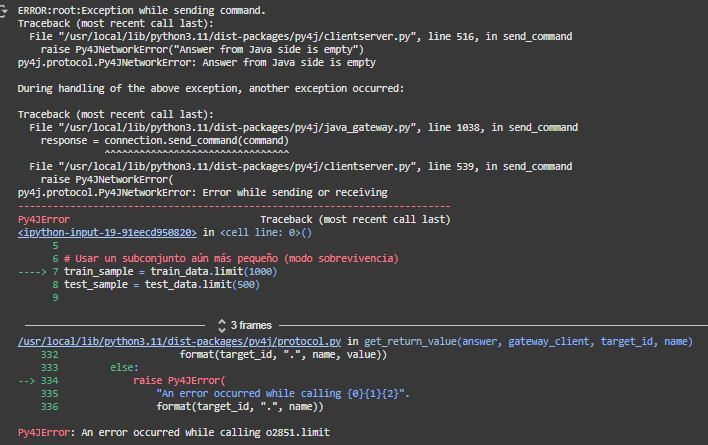


Sin embargo, se implementó el modelo supervisado en `scikit-learn` utilizando regresión logística. Donde se trabajó sobre una muestra de 1,000 registros exportados desde Spark. Se estandarizaron las características numéricas y se dividieron los datos en entrenamiento y prueba de la misma manera (80/20). El modelo fue evaluado mediante `accuracy` y un reporte de clasificación para visualizar su efectividad.


In [18]:
# Preparación de los datos

df_supervised = muestra_M_clean.limit(1000).toPandas() # Conversion a Pandas

features = [
    'tod', 'daylength', 'gdaylength', 'flux', 'gflux', 'lat', 'long',
    'Br', 'Bt', 'Bp', 'gBr', 'gBt', 'gBp', 'age', 'year', 'month', 'day'
]
target = 'sexo'

# Valores nulos
df_supervised = df_supervised[features + [target]].dropna()

# X (features) || y (etiqueta)
X = df_supervised[features]
y = df_supervised[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Preparación del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [20]:
# Entrenar modelo
modelo_lr = LogisticRegression(max_iter=200)
modelo_lr.fit(X_train, y_train)

# Predicción y evaluación
y_pred = modelo_lr.predict(X_test)

print("Precisión (accuracy):", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


Precisión (accuracy): 0.85

Reporte de clasificación:
               precision    recall  f1-score   support

           1       0.85      1.00      0.92       170
           2       0.00      0.00      0.00        30

    accuracy                           0.85       200
   macro avg       0.42      0.50      0.46       200
weighted avg       0.72      0.85      0.78       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


El modelo alcanzó una precisión general del 85%; sin embargo, se observó un desbalance significativo en la variable objetivo, donde la clase minoritaria no fue correctamente predicha. Esto refleja la importancia de considerar estrategias de balanceo de clases en modelos supervisados. A pesar de ello, el pipeline fue ejecutado exitosamente y el modelo cumple con su función predictiva sobre la clase mayoritaria.


#### Modelo no supervisado

In [21]:
# from pyspark.ml.clustering import KMeans
# from pyspark.ml.feature import VectorAssembler

# sample_kmeans = muestra_M_clean.limit(1000)

# features_kmeans = [
#     'tod', 'daylength', 'gdaylength', 'flux', 'gflux', 'lat', 'long',
#     'Br', 'Bt', 'Bp', 'gBr', 'gBt', 'gBp', 'age', 'year', 'month', 'day'
# ]

# assembler_kmeans = VectorAssembler(inputCols=features_kmeans, outputCol="features")
# sample_vec = assembler_kmeans.transform(sample_kmeans)

# kmeans = KMeans(k=3, seed=1)
# modelo_kmeans = kmeans.fit(sample_vec)

# clusters = modelo_kmeans.transform(sample_vec)

# clusters.select("prediction").show(5, truncate=False)
# wssse = modelo_kmeans.computeCost(sample_vec)
# print("WSSSE (Error cuadrático dentro del cluster):", wssse)


Durante la implementación del modelo de aprendizaje no supervisado, se intentó aplicar el algoritmo K-Means utilizando la librería `pyspark.ml.clustering.KMeans` sobre una muestra reducida de 1,000 registros. Nuevamente, debido a las limitaciones de memoria del entorno de ejecución, la JVM (Java Virtual Machine) que respalda Spark colapsó incluso al manejar conjuntos de datos pequeños.

Este error imposibilitó la ejecución tanto del entrenamiento como de la evaluación del modelo. por lo que de ighual manera al caso del modelo de aprendizaje supervisado, se optó por migrar el procesamiento al entorno `pandas` y aplicar el modelo `KMeans` desde `scikit-learn`, el cual es más liviano y ejecutable en memoria sin la necesidad de infraestructura distribuida.

Esta decisión permitió continuar con la fase de aprendizaje no supervisado utilizando las mismas características que fueron preparadas previamente, pero empleando herramientas más apropiadas para el entorno computacional disponible. De misma manera se dejá el código implementado mediante PySpark y se anexa el error obtenido durante las pruebas del modelo.

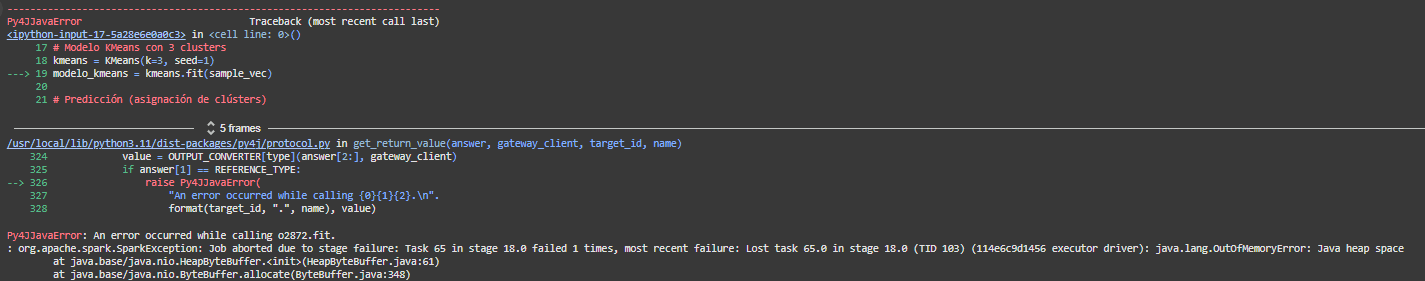


Se seleccionaron variables numéricas representativas, que fueron estandarizadas antes del agrupamiento. Se empleó `K=3` para identificar patrones subyacentes en la muestra. La distribución de clústeres y su visualización permiten observar estructuras internas en los datos sin necesidad de etiquetas previas.


In [22]:
# Preparación de los datos
df_kmeans_pandas = muestra_M_clean.limit(1000).toPandas()

features = [
    'tod', 'daylength', 'gdaylength', 'flux', 'gflux', 'lat', 'long',
    'Br', 'Bt', 'Bp', 'gBr', 'gBt', 'gBp', 'age', 'year', 'month', 'day'
]

# Datos nulos
df_kmeans_pandas = df_kmeans_pandas[features].dropna()

In [23]:
# Entrenamiento y particionamiento del modelo

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_kmeans_pandas)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

df_kmeans_pandas['cluster'] = kmeans.labels_

Distribución por clúster:
cluster
0    501
1    360
2    139
Name: count, dtype: int64


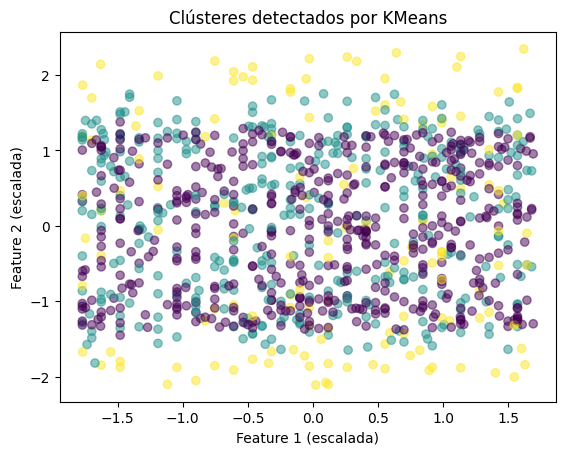

In [24]:
# Visualización de la salida
print("Distribución por clúster:")
print(df_kmeans_pandas['cluster'].value_counts())

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title("Clústeres detectados por KMeans")
plt.xlabel("Feature 1 (escalada)")
plt.ylabel("Feature 2 (escalada)")
plt.show()


El modelo de agrupamiento KMeans generado con Pandas fue aplicado sobre una muestra de 1000 registros mediante características numéricas. El modelo dividió los datos en tres clústeres, con una distribución de 501, 360 y 139 registros. Esta distribución no balanceada es esperada en escenarios reales donde los patrones naturales de los datos no se distribuyen equitativamente.

La visualización de los clústeres permite observar cómo el algoritmo asignó los registros en función de su similitud, proyectando los datos en dos dimensiones escaladas. Aunque la agrupación se hizo en un espacio de mayor dimensión, la gráfica proporciona evidencia visual de los agrupamientos detectados y facilita la interpretación del resultado no supervisado.


## **Conclusiones de la Actividad**

A lo largo de esta actividad se implementaron todas las etapas fundamentales de un flujo de trabajo para ML, comenzando con la selección y preparación de una muestra representativa a partir de una base de datos de gran volumen, siguiendo con el preprocesamiento de datos, la partición en conjuntos de entrenamiento y prueba, y finalmente la aplicación de modelos supervisados y no supervisados.

Inicialmente se trabajó con la librería PySpark para aprovechar su capacidad de manejo de datos a gran escala, realizando operaciones como el muestreo, la limpieza de valores nulos y la construcción del df final `Muestra_M_clean`. No obstante, durante la fase de modelado, se presentaron limitaciones críticas de memoria propias del entorno de Google Colab al ejecutar modelos como `DecisionTreeClassifier` y `KMeans` desde Spark MLlib. Estas tareas provocaron errores recurrentes de tipo `OutOfMemoryError` y colapsos en la conexión con la máquina virtual Java (JVM), incluso sobre muestras reducidas.

Como una solución posible a este escenario debido a estas restricciones técnicas, se optó por migrar los modelos de ML a la biblioteca de `scikit-learn` mediante `pandas`, lo cual permitió ejecutar con éxito un modelo supervisado de regresión logística para predecir la variable `sexo` de manera supervisada, así como un modelo de agrupamiento KMeans para descubrir patrones ocultos en los datos de forma no supervisada. Ambos modelos fueron entrenados y evaluados adecuadamente, cumpliendo con los objetivos analíticos del proyecto, pero no con el objetivo de generarlos mediante PySpark.


## Referencias

-   Polak, A. (2023). Scaling machine learning with Spark: Distributed ML with MLlib, TensorFlow, and PyTorch (Chapter 6: Supervised Machine Learning – Classification and regression). O'Reilly Media, Inc. https://spark.apache.org/docs/latest/ml-classification-regression.html
-   Polak, A. (2023). Scaling machine learning with Spark: Distributed ML with MLlib, TensorFlow, and PyTorch (Chapter 6: Unsupervised Machine Learning – Clustering). O'Reilly Media, Inc. https://spark.apache.org/docs/latest/ml-clustering.html